# Movement

In [89]:
# Importing libraries
import matplotlib.pyplot as plot;
import numpy as np;


## Useful Functions


In [90]:
def Plot(xRange, yValues, labels, colors=None, styles=None, title="", axisLabels=("x", "y"), plotSize=(6, 6)):
    plot.figure(figsize=plotSize);
    numFunctions = len(yValues);
    
    if (not styles): styles = np.empty(numFunctions, dtype="object"); styles[:] = "-";
    if (not colors): colors = np.empty(numFunctions, dtype="object"); colors[:] = None;
    
    for i in range(numFunctions):
        plot.plot(xRange, yValues[i], label=labels[i], c=colors[i], linestyle=styles[i]);
        
    plot.title(title);
    plot.xlabel(axisLabels[0]);
    plot.ylabel(axisLabels[1]);
    
    plot.legend();
    plot.grid();

    plot.show();

## Movement Methods:

In [116]:
# Euler method
def Euler(Dy, y0, start, end, numPoints):
    dx = (end - start) / numPoints;
    
    x = np.arange(start, end, dx);
    y = np.zeros(numPoints);

    y[0] = y0;

    for i in range(numPoints - 1): y[i + 1] = y[i] + Dy(x[i]) * dx;

    return x, y;

In [117]:
# Verlet method
def Verlet(D2y, Dy0, y0, start, end, numPoints):
    dx = (end - start) / numPoints;
    
    x = np.arange(start, end, dx);
    y = np.zeros(numPoints);
    
    y[0] = y0;
    y[1] = y0 + Dy0 * dx;

    for k in range(1, numPoints - 1): 
        y[k + 1] = 2 * y[k] - y[k - 1] + D2y(x[k]) * dx ** 2;
        
    return x, y;

In [124]:
# Leap Frog method
def LeapFrog(D2y, Dy0, y0, start, end, numPoints):
    dx = (end - start) / numPoints;

    x = np.arange(start, end, dx);
    y = np.zeros(numPoints);

    y[0] = y0;
    Dy = Dy0 - D2y(x[0]) * dx / 2;

    for k in range(numPoints - 1):
        Dy += D2y(x[k]) * dx;
        y[k + 1] = y[k] + Dy * dx;
        
    return x, y;

In [119]:
# Velocity Verlet method
def VelocityVerlet(d2y, dy0, y0, start, end, numPoints):
    dx = (end - start) / numPoints;
    
    x = np.arange(start, end, dx);
    y = np.zeros(numPoints);

    y[0] = y0;
    dy   = dy0;
    for k in range(0, numPoints - 1): 
        dy += d2y(x[k]) * dx / 2;
        y[k + 1] = y[k] + dy * dx;
        dy += d2y(x[k]) * dx / 2;
        
    return x, y;

In [120]:
# Runge Kutta methods
def RK2(Dy, y0, start, end, numPoints):
    dx = (end - start) / numPoints;
    
    x = np.arange(start, end, dx);
    y = np.zeros(numPoints);

    y[0] = y0;
    for k in range(0, numPoints - 1): 
        # Calculating increments
        k1 = Dy(x[k], y[k]);
        k2 = Dy(x[k] + dx/2, y[k] + dx * k1 / 2);
        
        y[k + 1] = y[k] + k2 * dx;
        
    return x, y;

def RK4(Dy, y0, start, end, numPoints):
    dx = (end - start) / numPoints;
    
    x = np.arange(start, end, dx);
    y = np.zeros(numPoints);

    y[0] = y0;
    for k in range(0, numPoints - 1): 
        # Calculating increments
        k1 = Dy(x[k], y[k]);
        k2 = Dy(x[k] + dx/2, y[k] + dx * k1 / 2);
        k3 = Dy(x[k] + dx/2, y[k] + dx * k2 / 2);
        k4 = Dy(x[k] + dx,   y[k] + dx * k3);
        
        y[k + 1] = y[k] + (k1 + 2*k2 + 2*k3 + k4)/6 * dx;
        
    return x, y;

### Methods Applications:

#### 1. Particle in double simetric pit (Euler and Verlet)

In [126]:
# Setting functions coefficients.
a, b = 0.2, 0.1;
y = 0.01;

# Potential function and its derivatives.
def   V(x): return a*x**4 - b*x**2;
def  dV(x): return 4*a*x**3 - 2*b * x;
def dV2(x): return 12*a*x**2 - 2*b;

# Setting dissipation force
def DissipationForce(x):
    return -y * dV(x);

In [127]:
# Parameters
start, end = 0, 1;
numPoints = 50;
startPoint = 0;

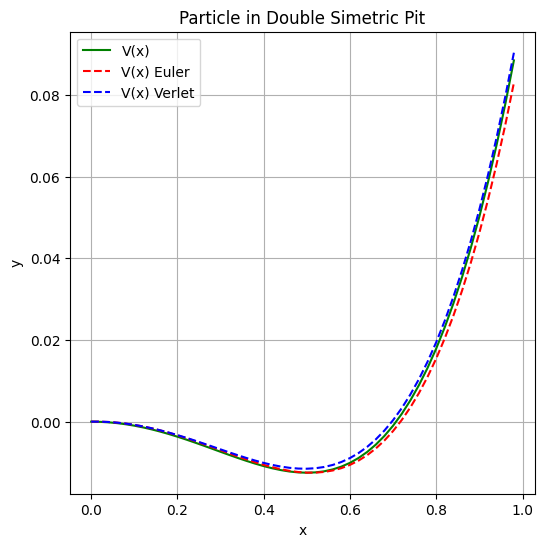

In [128]:
x, yEuler  = Euler(dV, startPoint, start, end, numPoints);
_, yVerlet = Verlet(dV2, dV(start), startPoint, start, end, numPoints);

Plot(x, [V(x) + startPoint, yEuler, yVerlet], 
        ["V(x)", "V(x) Euler", "V(x) Verlet"], 
        ["g", "r", "b", "k"], ["-", "--", "--"], 
         "Particle in Double Simetric Pit");

#### 2. Double assimetric pit with cubic term (Leap-Frog):

In [129]:
a, b, c = 1, 0.1, -1;
start, end = 0, 1;
numPoints = 50;

startPoint = 0;

def V(x)  : return a*x**4 - b*x**2 + c*x**3;
def dV(x) : return 4*a*x**3 - 2*b*x + 3*c*x**2;
def d2V(x): return 12*a*x**2 - 2*b + 6*c*x;

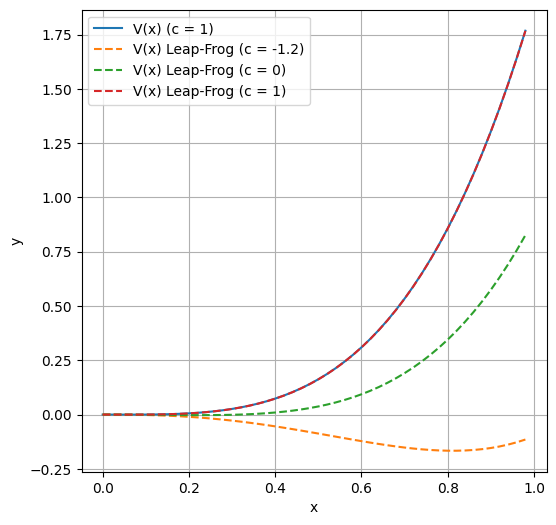

In [130]:
x, yFrog0 = LeapFrog(d2V, dV(start), startPoint, start, end, numPoints);

c = 0;
_, yFrog1 = LeapFrog(d2V, dV(start), startPoint, start, end, numPoints);

c = 1;
_, yFrog2 = LeapFrog(d2V, dV(start), startPoint, start, end, numPoints);

Plot(x, [V(x) + startPoint, yFrog0, yFrog1, yFrog2], 
        ["V(x) (c = 1)", "V(x) Leap-Frog (c = -1.2)", 
         "V(x) Leap-Frog (c = 0)", 
         "V(x) Leap-Frog (c = 1)"], styles=["-", "--", "--", "--"]);

#### 3. Non-harmonic pendulum (velocity Verlet):

In [131]:
start, end = -7, 0;
numPoints = 100;
startPoint = 0;

g, l = 9.8, 1;

def d2O(O): return -g / (l * np.sin(O));
def dO(O) : return g/l * np.log(np.abs(1 / np.tan(O) + 1 / np.sin(O)));

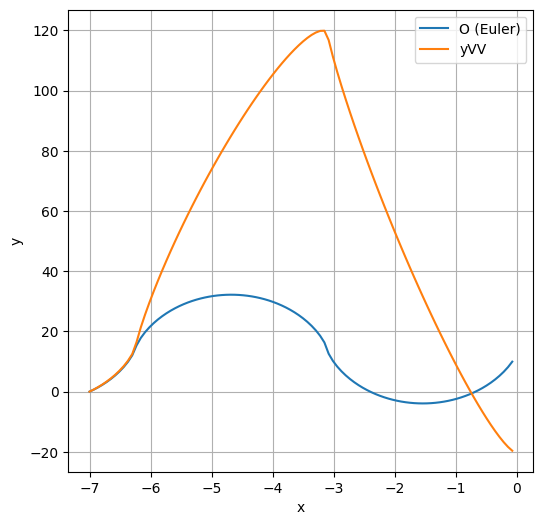

In [132]:
x, yVV = VelocityVerlet(d2O, dO(start), startPoint, start, end, numPoints);
_, yEuler = Euler(dO, startPoint, start, end, numPoints);

Plot(x, [yEuler, yVV], ["O (Euler)", "yVV"]);